In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# for Data-Vilsualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing data 
crime_data_1 = pd.read_csv("../input/RS_Session_246_AS11.csv")
crime_data_2 = pd.read_csv("../input/RS_Session_246_AU_98_1.1.csv")

# Preprocessing 

In [ ]:
# Overview of the Data 1
crime_data_1.head()

In [ ]:
crime_data_1.tail(10)

In [ ]:
# We have rows stating Total number of Crimes in States/UTs 
# Removing them as it not important as of now
crime_data_1.drop([29,37,38],axis=0,inplace=True)
crime_data_1.shape

In [ ]:
# Overview of the Data 2
crime_data_2.head()

In [ ]:
crime_data_2.tail(10)

In [ ]:
crime_data_2.drop([36],axis=0,inplace=True)
crime_data_2.shape

In [ ]:
# Making States as Index in both DataFrame
crime_data_1.rename(columns={"States/UTs":"State/UT"},inplace=True)
crime_data_1.set_index(crime_data_1["State/UT"],inplace=True)
crime_data_1.head()

In [ ]:
crime_data_1.drop(["State/UT"],axis=1,inplace=True)

In [ ]:
crime_data_2.set_index(crime_data_2["State/UT"],inplace=True)
crime_data_2.drop(["State/UT"],axis=1,inplace=True)
crime_data_2.head()

In [ ]:
crime_data_1.index

In [ ]:
crime_data_2.index

In [ ]:
# Index with different name format :
# data1             data2
# A & N Islands     A & N Island
# D&N Haveli        D & N Haveli
# Delhi UT          Delhi
# Making changes in one of the dataFrame
crime_data_1.rename(index={"A & N Islands":"A & N Island","D&N Haveli":"D & N Haveli","Delhi UT" : "Delhi"},inplace=True)

In [ ]:
# Merging both DataFrames 
data = pd.concat([crime_data_1,crime_data_2],axis=1)
data.head()

In [ ]:
data.shape

In [ ]:
# Removing duplicate columns
data.drop(["2015 - Total rape Cases","2016 - Total rape Cases"],axis=1,inplace=True)
data.head()

# Exploratory Data Analysis 

In [ ]:
# Index, Datatype and Memory information
data.info()
# All columns are in proper format

### Data information :
* Number of States = 29
* Number of Uts    = 7

### Rape & Total Cases data of Years :
2014,2015,2016

### Assault & Murder Data of Years :
2015,2016

## Things we could do :
* Analysis of crime by Direction wise grouping of states
* Adding a new feature "Increase in crime rates with time(Years)"
* State wise analysis
* Comparision between States and UTs
* Are there any other factors related with number of crimes? *(Though we don't have data of other facors)*

## State/UTs wise analysis

In [ ]:
# Figure Size
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=data["2014 - Cases registered"],ci=None,label="2014")
sns.lineplot(x=data.index,y=data["2015 - Cases registered"],ci=None,label="2015")
sns.lineplot(x=data.index,y=data["2016 - Cases registered"],ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("2014-2015-2016 Total Cases Registered")
plt.ylabel("Total Cases registered")
plt.legend()


### Observations :
* Uttar Pradesh is having a big rise in crime(2015-16) as compared to the other States
* As compared to other small States(by Population or Area) *Assam* has very high number in Crime Cases
* To gain more insights we could analyze "Total number of Case Registered" with population in State

In [ ]:
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=data["2014 - Total rape Cases"],ci=None,label="2014")
sns.lineplot(x=data.index,y=data["Rape - 2015"],ci=None,label="2015")
sns.lineplot(x=data.index,y=data["Rape - 2016"],ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("2014-2015-2016 Total Rape Cases")
plt.ylabel("Total Rape Cases")
plt.legend()


### Observations : 
* Same as we have seen above : Uttar Pradesh has a very big rise in number of Rape Cases(2015-2016)
* Where on the other side Madhya Pradesh has highest number of Rape Cases from 2014-2016
* Maharashtra has 2nd highest and 3rd highest number of Rape Cases in 2015 and 2016 respectively
* Karnataka has major decrease in rape cases from 2014-2015 but major rise from 2015-2016
* We will see % of rape cases in every state to gain more insights

In [ ]:
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=(data["2014 - Total rape Cases"]/data["2014 - Cases registered"])*100,ci=None,label="2014")
sns.lineplot(x=data.index,y=(data["Rape - 2015"]/data["2015 - Cases registered"])*100,ci=None,label="2015")
sns.lineplot(x=data.index,y=(data["Rape - 2016"]/data["2016 - Cases registered"])*100,ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("% of Rape Cases during 2014-2016")
plt.ylabel("% of Rape Cases")
plt.legend()

### Observations : 
* We can see most of the UTs have % of Rape Cases higher than % of other cases
* D & N Haveli, Lakshdweep, Meghalaya & Sikkim have very big rise in % of Rape cases (2015-16)
* On the other hand Goa, Mizoram & Nagaland have drop in % of Rape Cases (2015-2016)
* **Mizoram & Nagaland are the only Sates which have decrease in % of Rape Cases during (2014-2016)**
* Andhra Pradesh, Bihar, Jammu & Kashmir, Tamilnadu, Telangana, Uttar Pradesh & West Bengal have Rape Crime less than 10% as compared to other crimes in State

In [ ]:
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=(data["Assaults (molestation) - 2015"]/data["2015 - Cases registered"])*100,ci=None,label="2015")
sns.lineplot(x=data.index,y=(data["Assaults (molestation) - 2016"]/data["2016 - Cases registered"])*100,ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("2015-2016 % of Assaults (Molestation) Cases")
plt.ylabel("% of Assaults( Molestation) Cases")
plt.legend()

### Observations : 
* Bihar is the only State which has Assaults less than 5%
* Goa, Jammu & Kashmir, Karnataka, Kerala, Maharashtra, Mizoram, Odissa & Pundcherry have Assaults Cases more than 35%
* States that has rise in Rape cases has drop in Assault Cases
* **Mizoram** is the state which has high rise in Assault Cases during (2015-2016)
* Gujarat, Jharkhand, Nagaland, Rajasthan, Tamilnadu & West Bengal have Assault Cases % b/w (10-20)

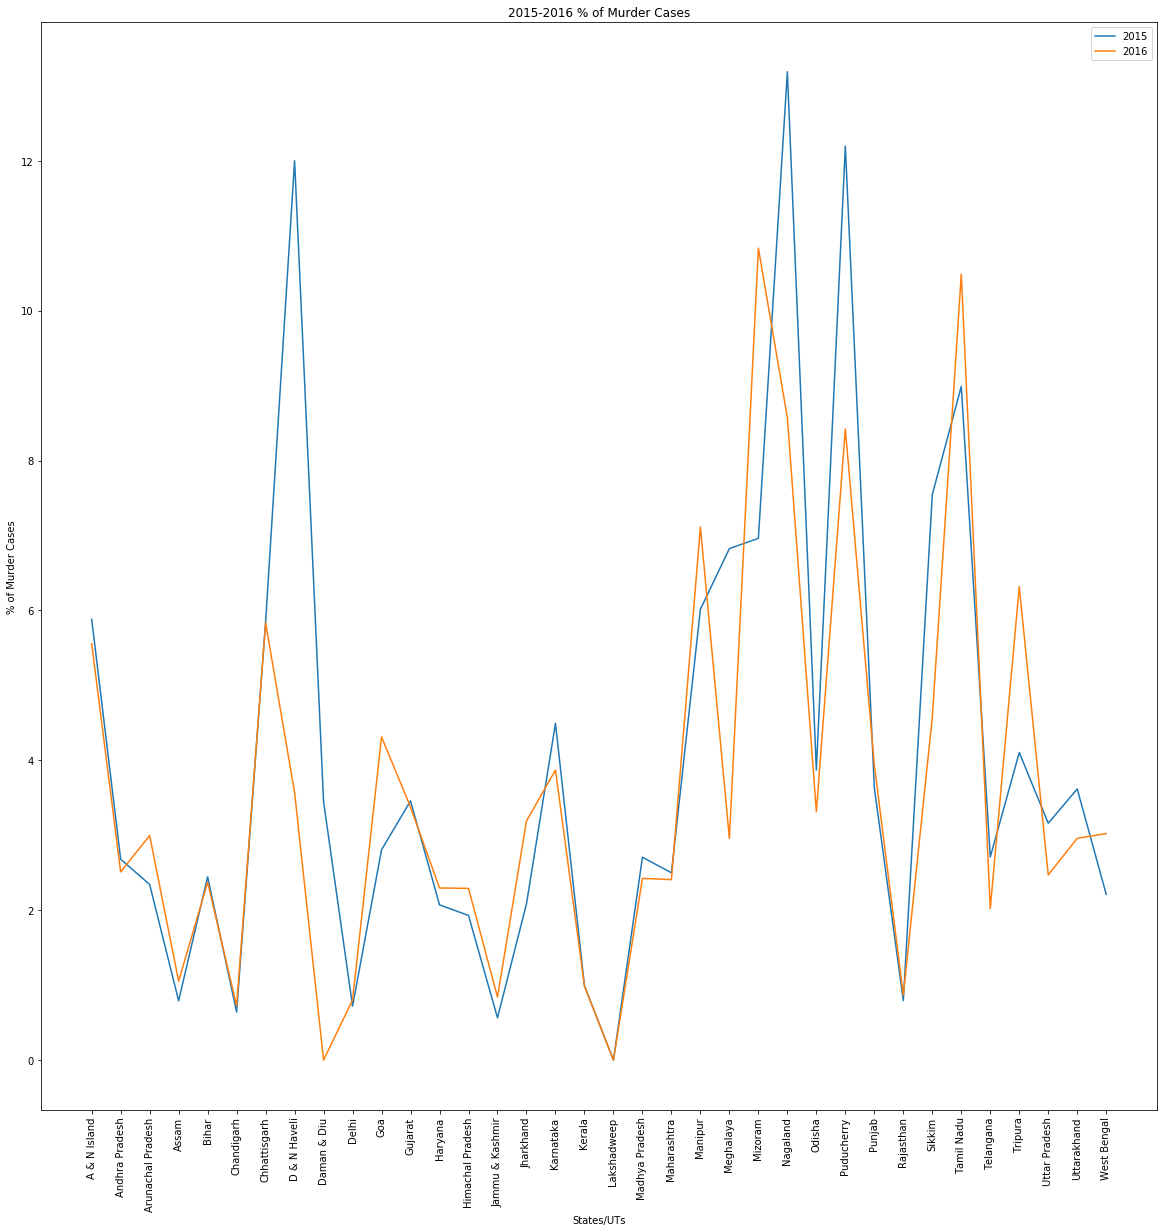

In [26]:
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=(data["Murder (women) - 2015"]/data["2015 - Cases registered"])*100,ci=None,label="2015")
sns.lineplot(x=data.index,y=(data["Murder (women) - 2016"]/data["2016 - Cases registered"])*100,ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("2015-2016 % of Murder Cases")
plt.ylabel("% of Murder Cases")
plt.legend()

### Observations : 
* Murders are **less** in % as compared to Rapes and Assaults across all States
* **(0-2)%** : Assam, Chandigarh, Delhi, Jammu&Kashmir, Lakshdweep & Rajasthan
* Goa, Manipur, **Mizoram**, Tamilnadu, **Tripura** & West Bengal have **rise** in Murder % 
* D&N Haveli, Daman & Diu, Nagaland, Meghalaya & Punducherry have high **drop** in Murder %
* % more than 8 in both of the years : Tamilnadu

### Zone wise Analysis

In [73]:
State_UT = []
UTs = ["A & N Island","D & N Haveli","Delhi","Puducherry","Chandigarh","Daman & Diu","Lakshadweep"]
for st in data.index:
    if st not in UTs:
        State_UT.append("State")
    else:
        State_UT.append("UT")
temp = pd.concat([data,pd.DataFrame(data={"State_UT":pd.Series(State_UT,index=data.index)})],axis=1)
temp.head()

,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016,2014 - Cases registered,2014 - Total rape Cases,2015 - Cases registered,2016 - Cases registered,State_UT
State/UT,,,,,,,,,,,
Andhra Pradesh,1027,994,4616,4829,428,411,16526,961,15967,16362,State
Arunachal Pradesh,71,92,101,109,9,11,351,83,384,367,State
Assam,1733,1779,4293,3378,185,220,19169,1980,23365,20869,State
Bihar,1041,1008,198,324,340,318,15393,1127,13904,13400,State
Chhattisgarh,1560,1626,1868,1770,338,347,6301,1436,5783,5947,State


In [74]:
North_India = ["Delhi","Haryana","Jammu & Kashmir","Himachal Pradesh","Uttar Pradesh","Punjab","Uttarakhand"]
West_India = ["D & N Haveli","Daman & Diu","Goa","Gujarat","Maharashtra","Rajasthan"]
South_India = ["Kerala", "Tamil Nadu", "Karnataka", "Andhra Pradesh","Telangana","Puducherry"]
Middle_India = ["Madhya Pradesh","Chhattisgarh"]
East_India = ["Odisha","West Bengal","Bihar","Jharkhand"]
North_East_India = ["Sikkim","Meghalaya","Assam","Arunachal Pradesh","Nagaland","Manipur","Tripura","Mizoram"]
Island_India = ["A & N Island","Lakshadweep"]

### North India

In [88]:
def directionwise(li,col):
    r = []
    for i in li:
        r.append(temp.loc[i,col])
    return pd.Series(r)

In [121]:
def PlotDirectionWise(List,col1,col2,title,ylabel):
    
    plt.figure(figsize=(5,5))

    sns.barplot(x=pd.Series(List),y=(directionwise(List,col1)/directionwise(List,col2))*100,hue=directionwise(List,"State_UT"))

    plt.xlabel("States/UTs")
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.legend()

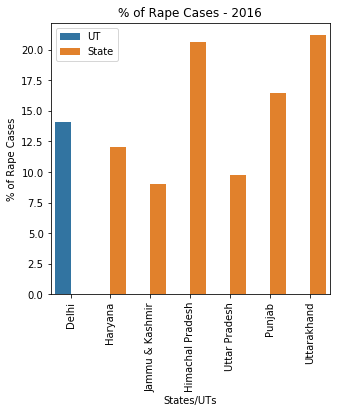

In [122]:
#PlotDirectionWise(North_India,"2014 - Total rape Cases","2014 - Cases registered","% of Rape Cases - 2014","% of Rape Cases")
#PlotDirectionWise(North_India,"Rape - 2015","2015 - Cases registered","% of Rape Cases - 2015","% of Rape Cases")
PlotDirectionWise(North_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Lowest  Rape Case % in 2016 : Jammu & Kashmir,Uttar Pradesh, Haryana
* Highest Rape Case % in 2016 : Uttrakhand, Himachal Pradesh, Punjab

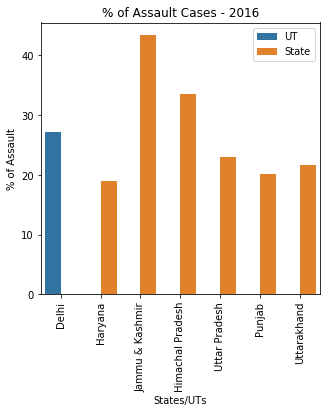

In [124]:
PlotDirectionWise(North_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lowest : Haryana, Punjab, Uttrakhand
* Highest : J & K, Himachal Pradesh, Delhi

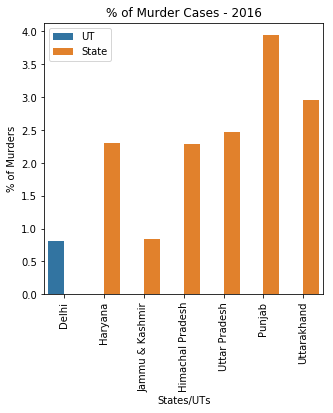

In [126]:
PlotDirectionWise(North_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* Lowest : Delhi, Jammu & Kashmir, Himachal Pradesh, Haryana
* Highest : Punjab, Uttrakhand (>2.5%)

### Haryana, Delhi & Uttar Pradesh are more safe in North India!!

### West India 

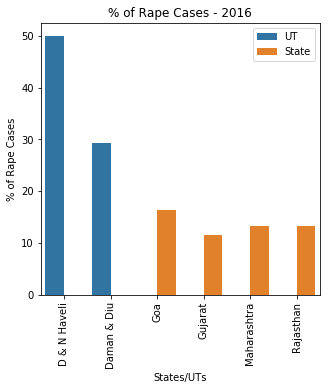

In [123]:
PlotDirectionWise(West_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Lowest %  : Gujarat,Maharashtra, Rajasthan
* Highest % : D & N Haveli, Daman & Diu

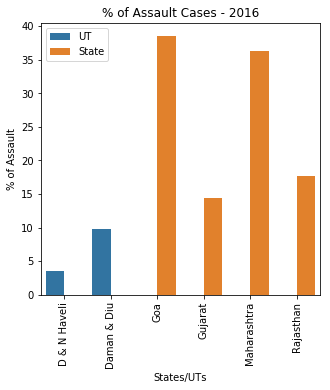

In [130]:
PlotDirectionWise(West_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lowest %  : D & N Haveli, Daman & Diu, Gujarat, Rajasthan
* Highest % : Goa, Maharashtra

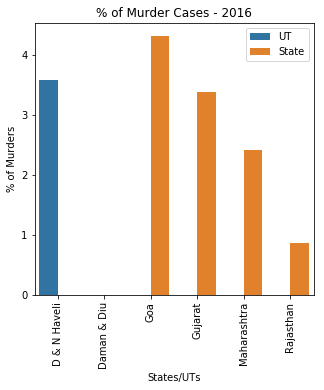

In [128]:
PlotDirectionWise(West_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* (Murder % is less (<5%))
* Lowest %  : Daman & Diu, Rajasthan, Maharashtra, Gujarat
* Highest % : Goa, D & N Haveli

### Gujarat & Rajasthan are more safe!!

### South India

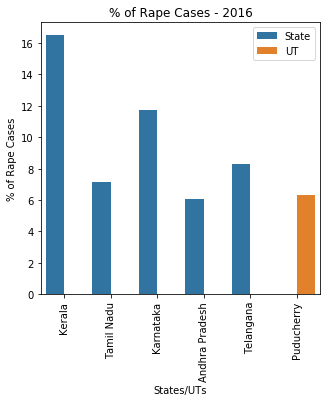

In [131]:
PlotDirectionWise(South_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Lowest %  : (<10%) Andhra Pradesh, Puducherry, Tamil Nadu, Telengana
* Highest % : (>10%) Kerala, Karnataka

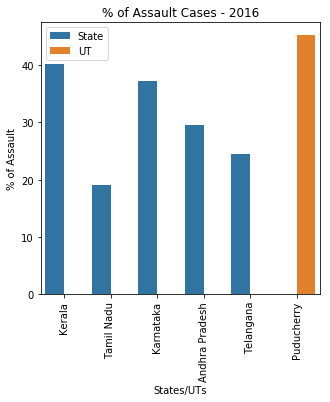

In [132]:
PlotDirectionWise(South_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lowest %  : (<20%) Tamil Nadu 
* Highest % : (>20%) Puducherry, Kerala, Karnataka, Andhra Pradesh, Telengana

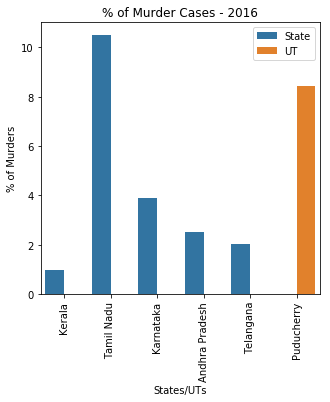

In [133]:
PlotDirectionWise(South_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* Lowest %  : (<4%) Kerala, Telangana, Andhra Pradesh, Karnataka
* Highest % : (>4%) Tamilnadu, Puducherry

### Telangana & Andhra Pradesh is more safe!!

### More to Explore